<a href="https://colab.research.google.com/github/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/blob/main/cristie_mod6_proj_final_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **Ciência de Dados: Fundamentos de Machine Learning**
---
---

## **Pós-graduação em Ciência de Dados (2025/2026)**

**Escola Superior de Tecnologia da Universidade Estadual do Amazonas - EST/UEA**
    
**Disciplina:** Fundamentos de Machine Learning

**Prof. Me.:** Mario Bessa

_**Repositório do Projeto Acadêmico no Github:** [e-SUS_Sinan_Mpox_ML-Workflow](https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow)_

_**Aluna:**_

- _A. Cristiane R. Lima (Cristie)_

_**Data:** 07 de setembro de 2025_


## **Projeto Final**
Este projeto está dividido em 2 notebooks para contemplar o fluxo completo de pré-modelagem e modelagem para o dataset [e-SUS Sinan/Mpox](https://opendatasus.saude.gov.br/ne/dataset/mpox), seguindo uma estrutura padronizada, do seguinte modo:

- cristie_mod6_proj_final_parte_1.ipynb: Aquisição, Análise Descritiva e Exploratória de Dados (EDA), Pré-processamento (Correção )

Foi desenvolvido a partir do notebook-base apresentado e explicado ao longo as aulas teórico-práticas em laboratório do Professor.

---

💡 **Nota técnica:** O link para o Dicionário de Dados está disponível na seção de *Análise Descritiva*. Recomenda-se mantê-lo aberto para facilitar a interpretação das variáveis.

⚠️ **Observação:** Linhas com o comentário `#debug#` indicam trechos opcionais para testes e inspeções pontuais — como a geração de arquivos `.csv` temporários para verificar o estado do DataFrame após imputações.

📚 **Referência:**  
KELLEHER, John D.; MAC NAMEE, Brian; D’ARCY, Aoife. *Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies*. 2. ed. Cambridge, MA: MIT Press, 2020.


---
### **Contextualização do Projeto**

A Mpox (Monkeypox) é uma doença infecciosa emergente que ganhou atenção internacional devido ao seu potencial de disseminação e impacto na saúde pública. No Brasil, o sistema e-SUS Sinan tem sido fundamental para o registro e monitoramento dos casos, permitindo a construção de bases de dados estruturadas para análise epidemiológica.

Este projeto tem como objetivo aplicar técnicas de aprendizado de máquina para explorar, tratar e modelar os dados disponíveis, com foco na geração de insights preditivos que possam apoiar estratégias de vigilância e resposta. A abordagem adotada contempla desde o pré-processamento e imputação de dados até a construção de modelos supervisionados, seguindo diretrizes metodológicas discutidas em ambiente acadêmico.

---

**Instruções:**

- Realizar os processamentos abaixo:

  - No notebook `cristie_mod6_proj_final_parte_1.ipynb`:
    -  Atividade 1: Limpar dados incorretos
    -  Atividade 2: Imputação de valores faltantes
  - No notebook `cristie_mod6_proj_final_parte_2.ipynb`:
    -  Atividade 3: Codificação de variáveis categóricas (OrdinalEncoder e OneHotEncoder)
    -  Atividade 4: Escalonamento de variáveis numéricas (StandardScaler e MinMaxScaler)
    -  Atividade 5: Balanceamento dos dados (Tomek e Smote)
    -  Atividade 6: Treinamento dos modelos de Machine Learning
    -  Atividade 7: Usar o modelo treinado

## Importa bibliotecas

In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns

# Para filtro de variância
from sklearn.feature_selection import VarianceThreshold


# Para garantir X 100% numérico e sem NaN antes de Tomek/SMOTE
from sklearn.impute import SimpleImputer

# Para aplicar TomerkLinks e SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

import joblib

#import matplotlib.pyplot as plt

In [2]:
# Para aplicar OrdinalEncoder ou OneHotEncoder em variáveis categóricas
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Para aplicar StandardScaler e MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Para garantir X 100% numérico e sem NaN antes de Tomek/SMOTE
from sklearn.impute import SimpleImputer

# Para aplicar TomerkLinks e SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [3]:
# Para divisão das bases em treinamento e teste
from sklearn.model_selection import train_test_split

## Tarefas preliminares

In [4]:
# Tarefas preliminares
#import pandas as pd

url = "https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/raw/refs/heads/main/data/mpox_2022_prep.parquet"
#url = "https://raw.githubusercontent.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/main/data/mpox_2022_prep.parquet" outra opção válida

# Carregar o parquet diretamente do GitHub
df_prep = pd.read_parquet(url, engine="pyarrow")  # ou engine="fastparquet"

print("✅ df_prep carregado com sucesso:", df_prep.shape)
df_prep.head()


✅ df_prep carregado com sucesso: (10920, 114)


,CLASSI_FIN,SG_UF,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,CO_UF_RES,ID_MN_RESI,NU_IDADE_N,CS_SEXO,COMP_SEXUAL,...,CLADO_missing,DOENCA_TRA.1_missing,NU_IDADE_N_missing,CONTAG_CD4_missing,DT_NOTIFIC_missing,DT_SIN_PRI_missing,DT_COLETA_missing,DATA_VACINA_missing,DT_INTERNA_missing,DT_EVOLUCAO_missing
0,1,PB,PB,250750,2022-12-08,25,250750,34,1,1,...,0,0,0,0,0,0,0,1,1,0
1,1,PR,PR,410690,2022-08-09,41,410690,36,1,1,...,0,0,0,1,0,0,0,1,1,0
2,1,PR,PR,410690,2022-08-08,41,410690,32,1,1,...,0,0,0,1,0,0,0,1,1,0
3,1,ES,PR,410690,2022-08-08,32,320520,29,1,1,...,0,0,0,1,0,0,0,1,1,0
4,1,PR,PR,410690,2022-08-05,41,410690,47,2,1,...,0,0,0,1,0,0,1,1,1,0


## 📌 Nota da seção – Desserialização dos dados

- O dataset pré-processado (`df_prep`) foi desserializado a partir do arquivo `.parquet`.  
- Esta etapa marca o início da **Parte 2 (Engenharia de Atributos & Modelagem)**.  
- Próximas etapas: **codificação das variáveis categóricas** e **escalonamento das variáveis numéricas**.

---

## **⚙️ Engenharia de Atributos: criando novas variáveis a partir das existentes.**

---



    Resumo da ações:
      1. Explosão de SINTOMA → dummies (min_freq opcional; default preserva todos).
      2. Deltas de datas (sem imputar; respeita NaT).
      3. Agregados clínicos (ISTs, imuno, vacina).
      4. Bins demográficos (idade, região).
      5. Interações (ex.: imuno × sintomas, centralização de delay por região).
      6. Targets (hosp, óbito).
      7. Auditorias.


---


### Engenharia de Atributos — Funções

In [5]:
# ==========================================
# ⚙️ ENGENHARIA DE ATRIBUTOS — FUNÇÕES E EXECUÇÃO
# ==========================================
#import pandas as pd
#import numpy as np

# ------------------------------------------------------------
# 1) Explosão de sintomas em dummies (com min_freq opcional)
# ------------------------------------------------------------
def explode_sintoma_dummies_simple(
    df: pd.DataFrame,
    col: str = "SINTOMA",
    prefix: str = "sx_",
    min_freq: int | None = None
) -> tuple[pd.DataFrame, list]:
    """
    Transforma a coluna de sintomas (strings separadas por vírgula) em colunas dummies (0/1).

    Parâmetros
    ----------
    df : DataFrame
        Base de entrada.
    col : str
        Nome da coluna que contém a lista de sintomas (ex.: "Febre, Cefaleia").
    prefix : str
        Prefixo a ser usado nas colunas dummies geradas (ex.: "sx_").
    min_freq : int | None
        - None → mantém TODOS os sintomas (recomendado para saúde; preserva informação).
        - inteiro ≥1 → mantém apenas sintomas com frequência absoluta ≥ min_freq
                       (útil futuramente para reduzir esparsidade).

    Retorno
    -------
    df_out : DataFrame
        DataFrame original + colunas dummies para cada sintoma selecionado.
    sintomas_cols : list[str]
        Lista com os nomes das colunas de sintomas criadas.
    """
    df_out = df.copy()

    if col not in df_out.columns:
        return df_out, []

    # Lista de sintomas por linha (minúsculas, trim de espaços; ignora strings vazias)
    s_clean = df_out[col].fillna("").astype(str)
    listas = s_clean.str.split(",").apply(lambda xs: [t.strip().lower() for t in xs if t.strip() != ""])

    # Frequência dos termos
    freq = pd.Series([t for sub in listas for t in sub]).value_counts()

    # Seleção por min_freq (se None → todos)
    if min_freq is None:
        termos = freq.index
    else:
        termos = freq[freq >= int(min_freq)].index

    # Criação de dummies (0/1) linha a linha
    for termo in termos:
        c = f"{prefix}{termo.replace(' ', '_')}"
        df_out[c] = listas.apply(lambda L: int(termo in L)).astype("Int64")

    sintomas_cols = [c for c in df_out.columns if c.startswith(prefix)]
    return df_out, sintomas_cols


# ------------------------------------------------------------
# 2) Features derivadas de datas (sem imputar datas)
# ------------------------------------------------------------
def add_date_features(
    df: pd.DataFrame,
    col_notif: str = "DT_NOTIFIC",
    col_inicio: str = "DT_SIN_PRI",
    col_evol: str = "DT_EVOLUCAO",
    col_intern: str = "DT_INTERNA",
    create_missing_flags: bool = True
) -> pd.DataFrame:
    """
    Cria deltas de tempo (em dias) a partir de colunas de datas — sem imputação.
    Se a linha não tiver ambas as datas válidas, o delta fica NaN.

    Parâmetros
    ----------
    df : DataFrame
        Base de entrada (datas podem estar em string; serão convertidas durante o cálculo).
    col_notif, col_inicio, col_evol, col_intern : str
        Nomes das colunas de datas conforme o dicionário.
    create_missing_flags : bool
        Se True, mantém/gera indicadores *_missing (0/1) para cada coluna de data original.

    Retorno
    -------
    DataFrame com as colunas:
      - delay_notif        = DT_NOTIFIC - DT_SIN_PRI
      - tempo_internacao   = DT_EVOLUCAO - DT_INTERNA
      - duracao_caso       = DT_EVOLUCAO - DT_SIN_PRI
    """
    out = df.copy()

    # Flags de ausência (se existirem as colunas)
    def _flag(col):
        if create_missing_flags and col in out.columns:
            out[f"{col}_missing"] = out[col].isna().astype("Int64")

    for c in [col_notif, col_inicio, col_evol, col_intern]:
        _flag(c)

    # Converte sob demanda apenas para calcular deltas
    to_dt = lambda s: pd.to_datetime(s, errors="coerce", dayfirst=True)

    if {col_notif, col_inicio}.issubset(out.columns):
        out["delay_notif"] = (to_dt(out[col_notif]) - to_dt(out[col_inicio])).dt.days

    if {col_evol, col_intern}.issubset(out.columns):
        out["tempo_internacao"] = (to_dt(out[col_evol]) - to_dt(out[col_intern])).dt.days

    if {col_evol, col_inicio}.issubset(out.columns):
        out["duracao_caso"] = (to_dt(out[col_evol]) - to_dt(out[col_inicio])).dt.days

    return out


# ------------------------------------------------------------
# 3) Agregados clínicos (ISTs, imunossupressão, vacinação)
# ------------------------------------------------------------
def add_clinical_aggregates(
    df: pd.DataFrame,
    ist_cols: list | None = None,
    col_imuno: str = "PAC_IMUNOSSUP",
    col_vacina: str = "VACINA"
) -> pd.DataFrame:
    """
    Cria agregações clínicas:

    - ist_any   : 1 se pelo menos uma IST específica = 1; 0 caso contrário (ignora NaN ao somar/max).
    - ist_count : soma das ISTs específicas (contagem).
    - imune_risco:
        PAC_IMUNOSSUP (1,2,3) → 1; 4→0; outros (9/NaN) → NA.
    - vacina_qualquer:
        VACINA in {1,2,3} → 1; VACINA==4 → 0; caso contrário → NA.

    Parâmetros
    ----------
    df : DataFrame
    ist_cols : list | None
        Lista explícita de colunas de ISTs. Se None, usa o conjunto padrão do mpox_2022.
    col_imuno : str
        Nome da coluna de imunossupressão.
    col_vacina : str
        Nome da coluna de vacinação.

    Retorno
    -------
    DataFrame com novas colunas: ist_any, ist_count, imune_risco, vacina_qualquer.
    """
    out = df.copy()

    if ist_cols is None:
        ist_cols = [
            "GONORREIA","CLAMIDEA","SIFILIS","HERPES_GENITAL","CANCRO_MOLE",
            "TRICHOMOMAS_VAGINALS","LINFOGRANULOMA","MYCOPLASMA_GENITAL",
            "HPV","DIP","DONOVANOSE","HTLV","VERRUGA_GENITAL"
        ]
    ist_cols = [c for c in ist_cols if c in out.columns]

    if ist_cols:
        out["ist_any"] = out[ist_cols].max(axis=1, skipna=True).astype("Int64")
        out["ist_count"] = out[ist_cols].sum(axis=1, skipna=True).astype("Int64")

    if col_imuno in out.columns:
        m = out[col_imuno].map({1:1, 2:1, 3:1, 4:0})
        out["imune_risco"] = m.astype("Int64")

    if col_vacina in out.columns:
        v = pd.Series(pd.NA, index=out.index, dtype="Int64")
        v = v.mask(out[col_vacina].isin([1,2,3])==True, 1)
        v = v.mask(out[col_vacina].eq(4)==True, 0)
        out["vacina_qualquer"] = v

    return out


# ------------------------------------------------------------
# 4) Bins demográficos / Região (UF→região)
# ------------------------------------------------------------
def add_demo_bins(
    df: pd.DataFrame,
    col_idade: str = "NU_IDADE_N",
    col_uf: str = "SG_UF"
) -> pd.DataFrame:
    """
    Cria faixas etárias e região (a partir de SG_UF).
    - faixa_etaria: categorias textuais (0–9, 10–17, 18–29, 30–39, 40–49, 50–59, 60+).
      (Mantém NaN quando NU_IDADE_N ausente).
    - regiao: Norte, Nordeste, Centro-Oeste, Sudeste, Sul (NaN se SG_UF ausente ou desconhecido).

    Parâmetros
    ----------
    df : DataFrame
    col_idade : str
        Nome da coluna de idade (anos).
    col_uf : str
        Nome da coluna de UF (sigla).

    Retorno
    -------
    DataFrame com 'faixa_etaria' (category) e 'regiao' (category).
    """
    out = df.copy()

    # Faixas etárias (ajustáveis)
    if col_idade in out.columns:
        bins = [-np.inf, 9, 17, 29, 39, 49, 59, np.inf]
        labels = ["0-9","10-17","18-29","30-39","40-49","50-59","60+"]
        out["faixa_etaria"] = pd.cut(out[col_idade], bins=bins, labels=labels).astype("category")

    # Mapeamento UF → Região (IBGE)
    uf_regiao = {
        # Norte
        "AC":"Norte","AP":"Norte","AM":"Norte","PA":"Norte","RO":"Norte","RR":"Norte","TO":"Norte",
        # Nordeste
        "AL":"Nordeste","BA":"Nordeste","CE":"Nordeste","MA":"Nordeste","PB":"Nordeste",
        "PE":"Nordeste","PI":"Nordeste","RN":"Nordeste","SE":"Nordeste",
        # Centro-Oeste
        "DF":"Centro-Oeste","GO":"Centro-Oeste","MS":"Centro-Oeste","MT":"Centro-Oeste",
        # Sudeste
        "ES":"Sudeste","MG":"Sudeste","RJ":"Sudeste","SP":"Sudeste",
        # Sul
        "PR":"Sul","RS":"Sul","SC":"Sul",
    }
    if col_uf in out.columns:
        out["regiao"] = out[col_uf].map(uf_regiao).astype("category")

    return out


# ------------------------------------------------------------
# 5) Interações (exemplos pragmáticos)
# ------------------------------------------------------------
def add_interactions(
    df: pd.DataFrame,
    sintomas_prefix: str = "sx_",
    center_delay_by: str = "regiao"
) -> pd.DataFrame:
    """
    Cria interações/transformações simples:

    - sintoma_count: soma dos dummies de sintomas (se existirem colunas com prefixo sintomas_prefix).
    - imune_risco_x_sintomas: produto de imune_risco * sintoma_count (se ambas existirem).
    - delay_notif_centered_regiao: delay_notif centrado pela média da região (se 'regiao' existir).

    Parâmetros
    ----------
    df : DataFrame
    sintomas_prefix : str
        Prefixo que identifica as colunas dummies de sintomas (default 'sx_').
    center_delay_by : str
        Coluna categórica para centralizar delay_notif por grupo (default 'regiao').

    Retorno
    -------
    DataFrame com novas colunas se aplicáveis.
    """
    out = df.copy()

    # Conta dummies de sintomas
    sint_cols = [c for c in out.columns if c.startswith(sintomas_prefix)]
    if sint_cols:
        out["sintoma_count"] = out[sint_cols].sum(axis=1, skipna=True).astype("Int64")

    # Interação com imunossupressão
    if {"imune_risco","sintoma_count"}.issubset(out.columns):
        # Usa 0 para NA ao multiplicar; resultado volta a Int64 com NA onde ambos eram NA
        tmp = out["imune_risco"].fillna(0) * out["sintoma_count"].fillna(0)
        tmp = tmp.mask(out["imune_risco"].isna() & out["sintoma_count"].isna(), pd.NA)
        out["imune_risco_x_sintomas"] = tmp.astype("Int64")

    # Centralização de delay_notif por região (ou outra coluna categórica)
    if "delay_notif" in out.columns and center_delay_by in out.columns:
        out["delay_notif_centered_regiao"] = (
            out["delay_notif"] - out.groupby(center_delay_by)["delay_notif"].transform("mean")
        )

    return out


# ------------------------------------------------------------
# 6) Targets (variáveis-alvo binárias)
# ------------------------------------------------------------
def add_targets(
    df: pd.DataFrame,
    col_hosp: str = "HOSPITAL",
    col_evol: str = "EVOLUCAO"
) -> pd.DataFrame:
    """
    Cria variáveis-alvo padronizadas para classificação:

    - target_hosp      : 1 se HOSPITAL == 1; 0 caso contrário (Int64 com NA onde não há dado).
    - target_obito_any : 1 se EVOLUCAO ∈ {1 (óbito MPX), 3 (óbito outra causa)}; 0 caso contrário.
    - target_obito_mpx : 1 se EVOLUCAO == 1; 0 caso contrário.

    Parâmetros
    ----------
    df : DataFrame
    col_hosp : str
        Nome da coluna de hospitalização (código).
    col_evol : str
        Nome da coluna de evolução (código).

    Retorno
    -------
    DataFrame com as três colunas de target.
    """
    out = df.copy()

    if col_hosp in out.columns:
        t = out[col_hosp].eq(1)
        out["target_hosp"] = t.where(out[col_hosp].notna(), pd.NA).astype("Int64")

    if col_evol in out.columns:
        any_obito = out[col_evol].isin([1,3])
        out["target_obito_any"] = any_obito.where(out[col_evol].notna(), pd.NA).astype("Int64")
        mpx = out[col_evol].eq(1)
        out["target_obito_mpx"] = mpx.where(out[col_evol].notna(), pd.NA).astype("Int64")

    return out


# ------------------------------------------------------------
# 7) Auditorias
# ------------------------------------------------------------
def audit_sintomas(df: pd.DataFrame, sintomas_cols: list[str]) -> pd.DataFrame:
    """
    Auditoria das dummies de sintomas:
    - non_nulls, sum_positives, percent_positives
    - status: marca colunas sempre-zero / sempre-NaN
    """
    if not sintomas_cols:
        return pd.DataFrame({"msg": ["Sem colunas de sintomas (prefixo não encontrado)."]})

    audit = pd.DataFrame({
        "non_nulls": df[sintomas_cols].notna().sum(),
        "sum_positives": df[sintomas_cols].sum(),
        "percent_positives": df[sintomas_cols].mean() * 100
    })
    audit["status"] = "-"
    audit.loc[audit["sum_positives"] == 0, "status"] = "⚠️ Sempre 0"
    audit.loc[audit["non_nulls"] == 0, "status"] = "⚠️ Sempre NaN"
    return audit.sort_values("percent_positives", ascending=False)


def audit_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Checagem rápida de presença e sanidade das principais novas features.
    Retorna um pequeno quadro-resumo (counts/NA/descrição de colunas-chave).
    """
    cols_check = [
        "delay_notif","tempo_internacao","duracao_caso",
        "ist_any","ist_count","imune_risco","vacina_qualquer",
        "faixa_etaria","regiao","sintoma_count","imune_risco_x_sintomas",
        "delay_notif_centered_regiao",
        "target_hosp","target_obito_any","target_obito_mpx"
    ]
    cols_check = [c for c in cols_check if c in df.columns]
    if not cols_check:
        return pd.DataFrame({"msg": ["Nenhuma coluna derivada encontrada para auditar."]})

    out = []
    for c in cols_check:
        s = df[c]
        out.append({
            "col": c,
            "dtype": str(s.dtype),
            "non_null": int(s.notna().sum()),
            "na": int(s.isna().sum()),
            "unique": int(s.nunique(dropna=True)),
            "sample_values": s.dropna().unique()[:5] if s.nunique(dropna=True) <= 10 else "many"
        })
    return pd.DataFrame(out).set_index("col")

### **Estrutura de Execução (orquestra todas as etapas)**

Neste momento como ainda está-se a explorar e atuar na Engenharia de Atributos, melhor manter todos os dummies de sintomas

In [6]:
# ------------------------------------------------------------
# 8) PIPELINE DE EXECUÇÃO (orquestra todas as etapas)
# ------------------------------------------------------------
def run_feature_engineering_pipeline(
    df: pd.DataFrame,
    sintomas_min_freq: int | None = None
) -> tuple[pd.DataFrame, dict]:
    """
    Executa a Engenharia de Atributos end-to-end:

    Etapas:
      1. Explosão de SINTOMA → dummies (min_freq opcional; default preserva todos).
      2. Deltas de datas (sem imputar; respeita NaT).
      3. Agregados clínicos (ISTs, imuno, vacina).
      4. Bins demográficos (idade, região).
      5. Interações (ex.: imuno × sintomas, centralização de delay por região).
      6. Targets (hosp, óbito).
      7. Auditorias.

    Parâmetros
    ----------
    df : DataFrame
        DataFrame pós-imputação/limpeza.
    sintomas_min_freq : int | None
        Cutoff para filtrar sintomas raros (None = mantém todos).

    Retorno
    -------
    df_feat : DataFrame
        DataFrame final enriquecido com todas as features derivadas.
    info : dict
        Dicionário com artefatos úteis:
          - 'sintomas_cols': lista de colunas dummies geradas
          - 'audit_sintomas': DataFrame de auditoria de sintomas
          - 'audit_features': DataFrame de auditoria final de features
    """
    # 1) Sintomas → dummies
    df1, sx_cols = explode_sintoma_dummies_simple(df, col="SINTOMA", prefix="sx_", min_freq=sintomas_min_freq)

    # 2) Datas → deltas
    df2 = add_date_features(df1)

    # 3) Agregados clínicos
    df3 = add_clinical_aggregates(df2)

    # 4) Bins demográficos / região
    df4 = add_demo_bins(df3)

    # 5) Interações
    df5 = add_interactions(df4)

    # 6) Targets
    df_feat = add_targets(df5)

    # 7) Auditorias
    audit_sx = audit_sintomas(df_feat, sx_cols)
    audit_ft = audit_feature_engineering(df_feat)

    info = {
        "sintomas_cols": sx_cols,
        "audit_sintomas": audit_sx,
        "audit_features": audit_ft
    }
    return df_feat, info


# ==========================================
# 🚀 EXECUÇÃO REAL NO DATAFRAME
# (assume que já existe mpox_2022_prep como df pós-imputação)
# ==========================================
df0 = df_prep.copy()

# ► Mantém todos os sintomas (literatura/consenso: preservar informação clínica agora)
df_feateng, fe_info = run_feature_engineering_pipeline(df0, sintomas_min_freq=None)

print("\n✔️ Engenharia de atributos concluída:")
print("\nTotal de colunas:", df_feateng.shape[1])
print("Total de linhas :", df_feateng.shape[0])



✔️ Engenharia de atributos concluída:

Total de colunas: 222
Total de linhas : 10920


/tmp/ipython-input-2614682301.py:280: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  out["delay_notif"] - out.groupby(center_delay_by)["delay_notif"].transform("mean")


### 📊 Distribuição das opções de variáveis-alvos binárias criadas após a Engenharia de Atributos

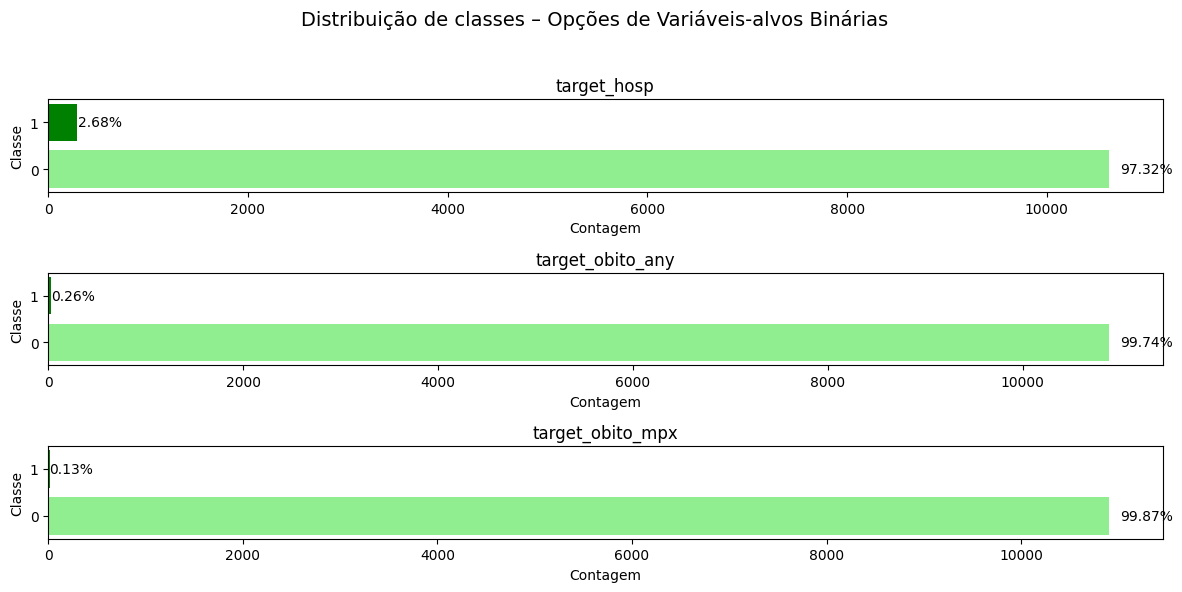

In [7]:
## 📊 Distribuição das opções de variáveis-alvos binárias criadas após a Engenharia de Atributos
# 📊 (df_feateng) – barras horizontais
import matplotlib.pyplot as plt

target_cols = ["target_hosp", "target_obito_any", "target_obito_mpx"]

fig, axes = plt.subplots(len(target_cols), 1, figsize=(12, 6))  # uma coluna, várias linhas

for i, target_col in enumerate(target_cols):
    y = df_feateng[target_col].astype(int)

    counts = y.value_counts().sort_index()
    ratios = (counts / counts.sum() * 100).round(2)

    bars = axes[i].barh([str(k) for k in counts.index], counts.values,
                        color=["lightgreen", "green"], alpha=1)

    # Adicionar percentuais ao lado de cada barra
    for bar, pct in zip(bars, ratios):
        width = bar.get_width()
        axes[i].text(width + (0.01*width), bar.get_y() + bar.get_height()/2,
                     f"{pct:.2f}%", ha="left", va="center", fontsize=10)

    axes[i].set_title(f"{target_col}")
    axes[i].set_xlabel("Contagem")
    axes[i].set_ylabel("Classe")

plt.suptitle("Distribuição de classes – Opções de Variáveis-alvos Binárias", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 📌 Nota da seção – Distribuição das variáveis-alvo binárias

- Foram verificadas as distribuições das três variáveis-alvo derivadas na Engenharia de Atributos:  
  - `target_hosp` → indica se o paciente foi hospitalizado.  
  - `target_obito_any` → indica se houve óbito (por Mpox ou outra causa).  
  - `target_obito_mpx` → indica se o óbito foi diretamente relacionado à Mpox.  

- Cada gráfico mostra a contagem absoluta e o percentual (%) de cada classe.  
- Observação:
  - Todas são **binárias (0 = ausência, 1 = ocorrência)**.  
  - As distribuições confirmam a presença de **desbalanceamento de classes**.  
  - Nesta fase do projeto, **ainda não se definiu um único target principal**.  
  - Serão aplicadas técnicas de modelagem em todas as três opções para avaliar:  
    - Relevância clínica/epidemiológica.  
    - Estabilidade do modelo.  
    - Métricas robustas (F1-score, AUC-PR).  
  - A decisão final sobre a variável-alvo será documentada após essa análise comparativa.


## Vetores de Colunas por Tipo de Variáveis (para as próximas etapas)

In [8]:
# ==========================================
# VETORES DE COLUNAS — ORGANIZAÇÃO POR TIPO
# (base: df_feateng após Engenharia de Atributos)
# ==========================================

# ================================
# CATEGÓRICAS NOMINAIS (texto / códigos IBGE)
# ================================
nominal_categorical_cols = [
    'SG_UF',        # sigla da UF
    'SG_UF_NOT',    # sigla da UF da notificação
    'ID_MUNICIP',   # código IBGE do município
    'CO_UF_RES',    # código IBGE da UF de residência
    'ID_MN_RESI'    # código IBGE do município de residência
]

# ================================
# NUMÉRICAS CATEGÓRICAS BINÁRIAS (0/1 já tratadas)
# ================================
numerical_as_binary_categ_cols = [
    'GONORREIA','CLAMIDEA','SIFILIS','HERPES_GENITAL','CANCRO_MOLE',
    'TRICHOMOMAS_VAGINALS','LINFOGRANULOMA','MYCOPLASMA_GENITAL',
    'HPV','DIP','DONOVANOSE','HTLV','VERRUGA_GENITAL'
]

# ================================
# NUMÉRICAS CATEGÓRICAS NOMINAIS (códigos sem ordem natural)
# ================================
numerical_as_nominal_categ_cols = [
    'CLASSI_FIN',             # classificação final
    'CS_SEXO',                # sexo do paciente
    'COMP_SEXUAL',            # comportamento sexual
    'ORIENTA_SEXUAL',         # orientação sexual
    'IDENT_GENERO',           # identidade de gênero
    'CS_RACA',                # raça/cor
    'IST_ATIVA',              # presença de IST ativa
    'TP_AMOST',               # tipo de amostra
    'ESTRANGEIRO',            # paciente estrangeiro
    'HIV',                    # status HIV
    'UTI',                    # internação em UTI
    'RESULTADO_EXA_LAB',      # resultado do exame laboratorial
    'PROFIS_SAUDE',           # paciente é profissional de saúde
    'TRATAMENTO_MONKEYPOX',   # realizou tratamento específico
    'HOSPITAL',               # status de hospitalização
    'EVOLUCAO',               # evolução do caso
    'VINCULO_EPI',            # vínculo epidemiológico
    'LOCAL_CONT',             # local provável de contágio
    'TRANSM',                 # forma de transmissão
    'CONTAT_ANIMAL',          # contato com animal
    'CS_GESTANT',             # condição gestacional
    'MET_LAB',                # método laboratorial
    'CARACT_GENOMICA',        # característica genômica
    'CLADO',                  # clado do vírus
    'DOENCA_TRA.1'            # código categórico de doença (coluna ajustada)
]

# ⚠️ Atenção:
# - PAC_IMUNOSSUP e VACINA já foram tratados na Engenharia (viraram imune_risco e vacina_qualquer).
# - SINTOMA já foi explodido em dummies sx_* na Engenharia.
# - Portanto, essas colunas não entram mais na codificação.

# ================================
# NUMÉRICAS DISCRETAS (para escalonamento posterior)
# ================================
numerical_discrete_cols = [
    'NU_IDADE_N',   # idade em anos
    'CONTAG_CD4'    # contagem de células CD4
]

# ================================
# TEMPORAIS (datas originais, mantidas para rastreio)
# ================================
date_temporal_cols = [
    'DT_NOTIFIC','DT_SIN_PRI','DT_COLETA','DATA_VACINA',
    'DT_INTERNA','DT_EVOLUCAO'
]

# ================================
# TEXTO LIVRE
# ================================
text_cols = [
    'OUTRO_DES'     # campo de descrição livre
]

# ================================
# IDENTIFICADOR TÉCNICO
# ================================
identif_cols = [
    '__arquivo_origem__'   # rastreabilidade da origem do arquivo
]

# ================================
# LISTA FINAL DE COLUNAS PARA ONE-HOT
# ================================
onehot_cols = [c for c in df_feateng.columns
               if c in nominal_categorical_cols
               or c in numerical_as_nominal_categ_cols]

print("✅ Colunas preparadas para OneHotEncoder:", onehot_cols)


✅ Colunas preparadas para OneHotEncoder: ['CLASSI_FIN', 'SG_UF', 'SG_UF_NOT', 'ID_MUNICIP', 'CO_UF_RES', 'ID_MN_RESI', 'CS_SEXO', 'COMP_SEXUAL', 'ORIENTA_SEXUAL', 'IDENT_GENERO', 'CS_RACA', 'IST_ATIVA', 'TP_AMOST', 'CS_GESTANT', 'ESTRANGEIRO', 'HIV', 'UTI', 'RESULTADO_EXA_LAB', 'PROFIS_SAUDE', 'TRATAMENTO_MONKEYPOX', 'HOSPITAL', 'EVOLUCAO', 'VINCULO_EPI', 'DOENCA_TRA.1', 'LOCAL_CONT', 'TRANSM', 'CONTAT_ANIMAL', 'MET_LAB', 'CARACT_GENOMICA', 'CLADO']


## 📌 Nota da seção – Definição dos vetores de colunas

- Antes de aplicar a **codificação de variáveis categóricas (OneHotEncoder)** e o **escalonamento de variáveis numéricas**, é fundamental organizar os atributos em **grupos semânticos**.  

- Este mapeamento torna explícito:
  - **Categóricas nominais** → codificadas por OneHot (ex.: UF, sexo, evolução do caso).  
  - **Numéricas categóricas binárias** → já são 0/1 e não precisam de codificação.  
  - **Numéricas discretas** → preparadas para escalonamento (ex.: idade, CD4).  
  - **Datas** → preservadas apenas para rastreabilidade, não entram na modelagem direta.  
  - **Texto livre** → isolado, podendo ser tratado futuramente por NLP ou descartado.  
  - **Identificadores técnicos** → usados somente para rastreabilidade, nunca na modelagem.  

- ⚠️ Observações importantes:
  - Colunas já tratadas na Engenharia (`SINTOMA`, `PAC_IMUNOSSUP`, `VACINA`) não entram novamente na codificação.  
  - As variáveis-alvo (`target_hosp`, `target_obito_any`, `target_obito_mpx`) **não passam por transformação**, permanecendo intactas para modelagem.  

- Este passo garante **consistência metodológica** e **reutilização**:
  - Na **codificação**: `nominal_categorical_cols` + `numerical_as_nominal_categ_cols`.  
  - No **escalonamento**: `numerical_discrete_cols`.  
  - Em **auditorias** e relatórios: permite verificar facilmente cada grupo de variáveis.  


---
## **Atividade 3: Codificação de variáveis categóricas (OrdinalEncoder e OneHotEncoder)**
---

-  Como não se tem variáveis categóricas ordinais, somente OneHotEncoder será **utilizado**

### **Codificação OneHotEncoder**

In [9]:
# =================================================
# 1) CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS (ONE-HOT)
# =================================================
#from sklearn.preprocessing import OneHotEncoder
#import pandas as pd

# Usa vetores já definidos no bloco anterior (garantem todas categóricas relevantes)
# ⚠️ Atenção: baseado em df_feateng (não mais df_atribsel)
onehot_cols = [c for c in df_feateng.columns
               if c in nominal_categorical_cols
               or c in numerical_as_nominal_categ_cols]

print(f"[OneHot] Colunas categóricas a codificar: {len(onehot_cols)}")

# Inicializa encoder
encoder = OneHotEncoder(
    drop='first',            # remove a 1ª categoria de cada coluna → evita multicolinearidade
    sparse_output=False,     # saída densa → fácil converter em DataFrame
    dtype=int,               # saída como inteiros 0/1
    handle_unknown='ignore'  # ignora categorias não vistas em treino
)

# Aplica transformação
encoded = encoder.fit_transform(df_feateng[onehot_cols])

# Converte para DataFrame com os novos nomes de colunas
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(onehot_cols),
    index=df_feateng.index
)

# Junta com o dataset original removendo colunas categóricas brutas
df_eng_ohe = pd.concat([df_feateng.drop(columns=onehot_cols), encoded_df], axis=1)


[OneHot] Colunas categóricas a codificar: 30


## 📌 Nota Técnica – Codificação de variáveis categóricas (OneHotEncoder)

- Foi aplicada a codificação **One-Hot** nas variáveis categóricas nominais de `df_feateng`.  
- Principais decisões:
  - `drop='first'` → evita multicolinearidade ao descartar a primeira categoria de cada variável.  
  - `handle_unknown='ignore'` → garante robustez caso surjam categorias novas em dados futuros.  
  - O resultado foi armazenado em `df_eng_ohe`.  

- ✅ Benefícios:  
  - Transforma variáveis categóricas em representações numéricas adequadas para modelos de ML.  
  - Mantém interpretabilidade, pois cada categoria vira uma coluna binária (0/1).  

- ⚠️ Observações:  
  - Colunas já tratadas na Engenharia (`sx_*`, `imune_risco`, `vacina_qualquer`, `faixa_etaria`, `regiao`) não foram recodificadas.  
  - Variáveis-alvo (`target_hosp`, `target_obito_any`, `target_obito_mpx`) foram preservadas.  
  - Auditoria confirmou que não restaram variáveis categóricas brutas no dataset.  

- O dataset resultante `df_eng_ohe` está **pronto para a próxima etapa da Engenharia de Atributos**:  
  - **Escalonamento das variáveis numéricas discretas** (`NU_IDADE_N`, `CONTAG_CD4`).  


## Auditoria Pós-codificação de Variáveis Categóricas

In [26]:
# ==========================================
# 2) AUDITORIA PÓS-CODIFICAÇÃO
# ==========================================
print("=== Auditoria Pós-Codificação de Variáveis Categóricas ===")

# Total de colunas antes e depois
print(f"- Total antes da codificação: {df_feateng.shape[1]}")
print(f"- Total depois da codificação: {df_eng_ohe.shape[1]}")

# Conferir se não restaram colunas categóricas "cruas"
restantes_cat = df_eng_ohe.select_dtypes(include=['object','category']).columns
if len(restantes_cat) > 0:
    print("⚠️ Restaram colunas categóricas sem codificação:", list(restantes_cat))
else:
    print("✅ Todas as categóricas foram codificadas.")

# Garantir que os targets continuam presentes
targets = ["target_hosp", "target_obito_any", "target_obito_mpx"]
alvo_faltando = [t for t in targets if t not in df_eng_ohe.columns]
if alvo_faltando:
    print("⚠️ Targets ausentes após codificação:", alvo_faltando)
else:
    print("✅ Variáveis-alvo preservadas:", targets)

# Conferir tipos predominantes
print("\nDtypes principais no dataset final:")
print(df_eng_ohe.dtypes.value_counts())

# Conferir presença de NaNs
nulos = df_eng_ohe.isna().sum().sum()
print(f"\nValores ausentes após codificação: {nulos}")

# ==========================================
# 📊 Auditoria da expansão dimensional (OneHotEncoder)
# ==========================================
orig_cols = len(onehot_cols)   # número de colunas categóricas originais
# incremento real = total pós - (total pré - originais)
new_cols = df_eng_ohe.shape[1] - (df_feateng.shape[1] - orig_cols)
increase = ((new_cols - orig_cols) / orig_cols) * 100 if orig_cols > 0 else 0

print("\n=== Auditoria da expansão dimensional (OneHotEncoder) ===")
print(f"Variáveis categóricas originais: {orig_cols}")
print(f"Variáveis após OneHotEncoder: {new_cols}")
print(f"Aumento percentual: {increase:.2f}%")


=== Auditoria Pós-Codificação de Variáveis Categóricas ===
- Total antes da codificação: 222
- Total depois da codificação: 1573
⚠️ Restaram colunas categóricas sem codificação: ['SINTOMA', 'OUTRO_DES', '__arquivo_origem__', 'faixa_etaria', 'regiao']
✅ Variáveis-alvo preservadas: ['target_hosp', 'target_obito_any', 'target_obito_mpx']

Dtypes principais no dataset final:
int64             1381
Int64              174
datetime64[ns]       6
float64              4
boolean              3
object               3
category             1
category             1
Name: count, dtype: int64

Valores ausentes após codificação: 62061

=== Auditoria da expansão dimensional (OneHotEncoder) ===
Variáveis categóricas originais: 30
Variáveis após OneHotEncoder: 1381
Aumento percentual: 4503.33%


## 🔎 Notas Interpretativas – Trade-offs da codificação categórica

- **OrdinalEncoder**: preserva ordem entre categorias, mas pode induzir relações artificiais.  
  - Exemplo: escolaridade (fundamental < médio < superior).  
  - Pode distorcer modelos lineares se aplicado em variáveis não ordinais.  

- **OneHotEncoder**: evita ordens artificiais, mas pode gerar explosão de dimensionalidade.  
  - Expansão significativa do número de colunas, mas garante consistência sem criar hierarquias falsas.  
  - Em modelos de árvore → impacto menor.  
  - Em modelos lineares → melhora a interpretabilidade.  

- **Decisão neste projeto**:  
  - O dataset **não contém variáveis ordinais genuínas** (mesmo `CS_GESTANTE` não é tratado como ordinal).  
  - Portanto, aplicou-se **somente OneHotEncoder** nas variáveis nominais.  

- **Dimensionalidade**:  
  - A codificação expandiu de **30 variáveis categóricas originais para 1381 variáveis dummies**.  
  - Isso representa um aumento de **4503.33%**, considerado aceitável pela literatura, já que preserva a informação clínica.  

📌 **Conclusão:** a estratégia escolhida equilibra **interpretabilidade** (evita falsas ordens) e **capacidade preditiva** (preserva variabilidade real).  
O dataset resultante `df_eng_ohe` está pronto para avançar à etapa de **escalonamento das variáveis numéricas discretas**.


---
## **Atividade 4: Escalonamento de variáveis numéricas (StandardScaler e MinMaxScaler)**

##### Percepção analítica: "Idade tem muitos outliers em 80+, mas o StandardScaler reduz o impacto no treino do modelo, enquanto o MinMax preserva os extremos comprimidos em 1."
---

In [11]:
# ==========================================
# 4) ESCALONAMENTO DE VARIÁVEIS NUMÉRICAS
# ==========================================
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Colunas discretas já definidas nos vetores
focus_vars = numerical_discrete_cols  # ["NU_IDADE_N", "CONTAG_CD4"]

# Inicializa escalonadores
scaler_std = StandardScaler()
scaler_mm = MinMaxScaler()

# Aplica transformações
df_scaled_std = pd.DataFrame(
    scaler_std.fit_transform(df_eng_ohe[focus_vars].astype(float)),
    columns=focus_vars,
    index=df_eng_ohe.index
)

df_scaled_mm = pd.DataFrame(
    scaler_mm.fit_transform(df_eng_ohe[focus_vars].astype(float)),
    columns=focus_vars,
    index=df_eng_ohe.index
)

# Junta ao dataset codificado
df_eng_scaled = pd.concat([df_eng_ohe, df_scaled_std.add_suffix("_std"), df_scaled_mm.add_suffix("_mm")], axis=1)

print("[Scaling] Dataset final:", df_eng_scaled.shape)
print("[Scaling] Variáveis numéricas escalonadas:", focus_vars)


[Scaling] Dataset final: (10920, 1577)
[Scaling] Variáveis numéricas escalonadas: ['NU_IDADE_N', 'CONTAG_CD4']


## Auditoria Pós-Escalonamento — Comparação de Estratégias (StandardScaler e MinMaxScaler)

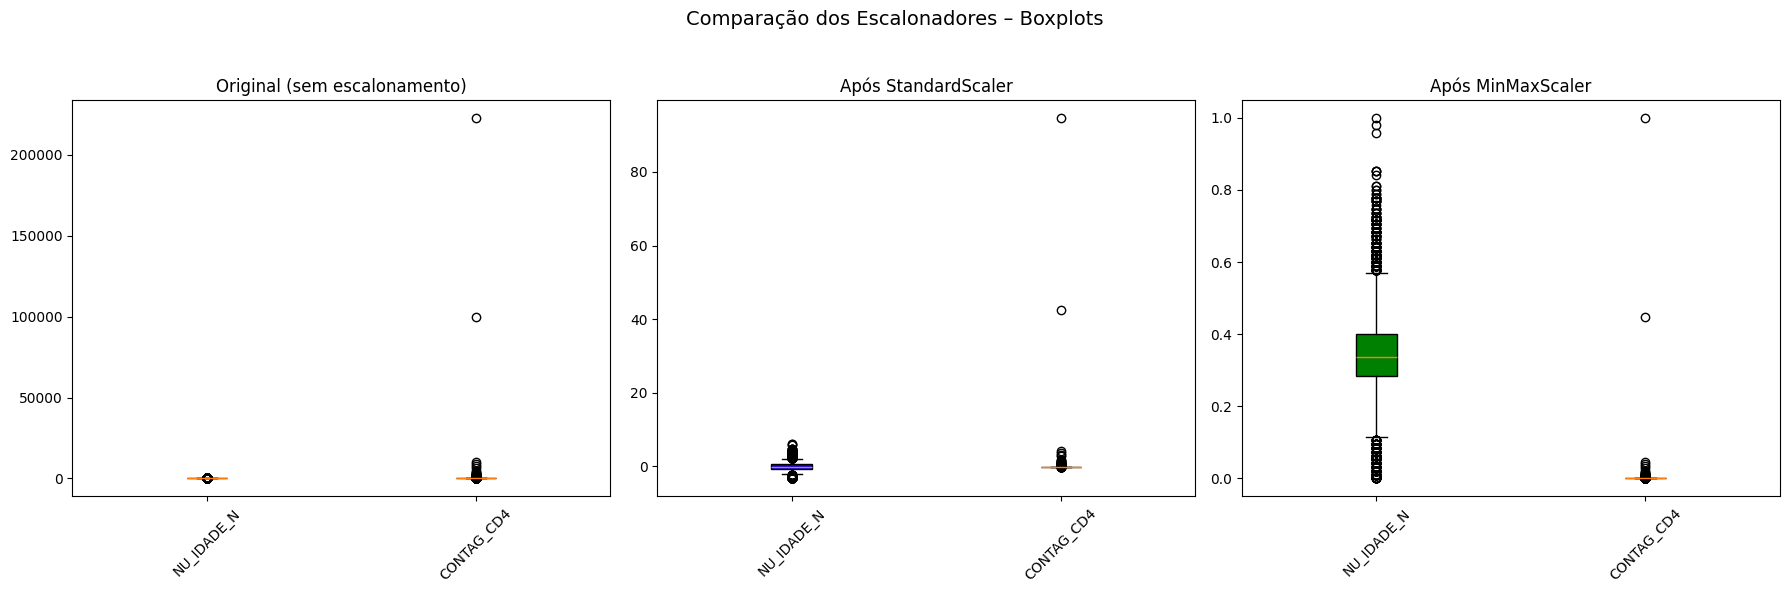

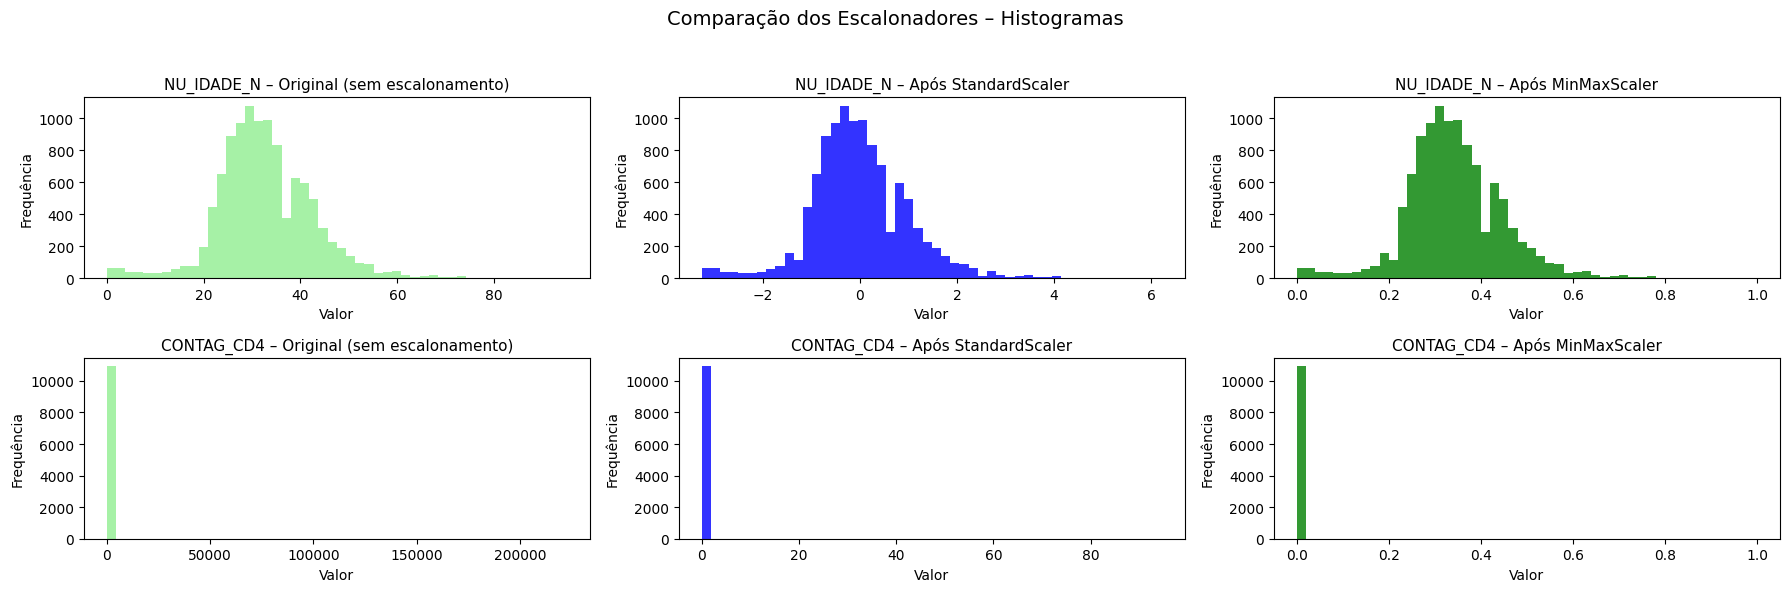


=== Estatísticas comparativas (antes vs pós-escalonamento) ===


Antes                          Pós-Std                        \
             Média    Desvio  Min       Max   Média Desvio    Min     Max   
NU_IDADE_N  32.652    10.023  0.0      95.0    -0.0    1.0 -3.258   6.221   
CONTAG_CD4  93.436  2352.481  0.0  222781.0    -0.0    1.0 -0.040  94.665   

           Pós-MinMax                   
                Média Desvio  Min  Max  
NU_IDADE_N      0.344  0.106  0.0  1.0  
CONTAG_CD4      0.000  0.011  0.0  1.0

In [18]:
# ==========================================
# 📊 AUDITORIA PÓS-ESCALONAMENTO
# Boxplots + Histogramas + Estatísticas
# ==========================================
import matplotlib.pyplot as plt

focus_vars = numerical_discrete_cols  # ["NU_IDADE_N", "CONTAG_CD4"]

# ----------------------------------------------------------
# 1) Função para estatísticas comparativas
# ----------------------------------------------------------
def resumo_stats_matriz(df_before, df_std, df_mm, cols):
    stats = {}
    for col in cols:
        stats[col] = {
            ("Antes", "Média"):  df_before[col].mean(),
            ("Antes", "Desvio"): df_before[col].std(),
            ("Antes", "Min"):    df_before[col].min(),
            ("Antes", "Max"):    df_before[col].max(),

            ("Pós-Std", "Média"):  df_std[col].mean(),
            ("Pós-Std", "Desvio"): df_std[col].std(),
            ("Pós-Std", "Min"):    df_std[col].min(),
            ("Pós-Std", "Max"):    df_std[col].max(),

            ("Pós-MinMax", "Média"):  df_mm[col].mean(),
            ("Pós-MinMax", "Desvio"): df_mm[col].std(),
            ("Pós-MinMax", "Min"):    df_mm[col].min(),
            ("Pós-MinMax", "Max"):    df_mm[col].max(),
        }
    df_stats = pd.DataFrame(stats).T.round(3)
    df_stats.columns = pd.MultiIndex.from_tuples(df_stats.columns)
    return df_stats

# ----------------------------------------------------------
# 2) Boxplots comparativos
# ----------------------------------------------------------
datasets = {
    "Original (sem escalonamento)": df_eng_ohe[focus_vars].astype(float).values,
    "Após StandardScaler": df_scaled_std.values,
    "Após MinMaxScaler": df_scaled_mm.values
}

colors = ["lightgreen", "blue", "green"]

fig, axes = plt.subplots(1, len(datasets), figsize=(18, 6))
for ax, (title, data), color in zip(axes, datasets.items(), colors):
    ax.boxplot(data, tick_labels=focus_vars, vert=True, patch_artist=True,
               boxprops=dict(facecolor=color))
    ax.set_title(title, fontsize=12)
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Comparação dos Escalonadores – Boxplots", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# ----------------------------------------------------------
# 3) Histogramas comparativos
# ----------------------------------------------------------
fig, axes = plt.subplots(len(focus_vars), len(datasets), figsize=(18, 6))
for i, var in enumerate(focus_vars):
    for j, (title, data) in enumerate(datasets.items()):
        axes[i, j].hist(data[:, i], bins=50, color=colors[j], alpha=0.8)
        axes[i, j].set_title(f"{var} – {title}", fontsize=11)
        axes[i, j].set_xlabel("Valor")
        axes[i, j].set_ylabel("Frequência")
plt.suptitle("Comparação dos Escalonadores – Histogramas", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
"""
# ----------------------------------------------------------
# 3b) Histogramas extras para CONTAG_CD4 com escala log
# ----------------------------------------------------------
fig, axes = plt.subplots(1, len(datasets), figsize=(18, 4))
for j, (title, data) in enumerate(datasets.items()):
    axes[j].hist(data[:, focus_vars.index("CONTAG_CD4")], bins=50, color=colors[j], alpha=0.8)
    axes[j].set_xscale("log")
    axes[j].set_title(f"CONTAG_CD4 – {title} (escala log)", fontsize=11)
    axes[j].set_xlabel("Valor (log)")
    axes[j].set_ylabel("Frequência")

plt.suptitle("Distribuição de CONTAG_CD4 – Escala log", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
"""
# ----------------------------------------------------------
# 4) Estatísticas comparativas em formato matricial
# ----------------------------------------------------------
comparativo_stats_matriz = resumo_stats_matriz(
    df_eng_ohe[focus_vars], df_scaled_std, df_scaled_mm, focus_vars
)

print("\n=== Estatísticas comparativas (antes vs pós-escalonamento) ===")
display(comparativo_stats_matriz)


## 📌 Nota da seção – Auditoria Pós-Escalonamento — Comparação de Estratégias (StandardScaler e MinMaxScaler)

- Foram aplicados dois métodos: **StandardScaler (z-score)** e **MinMaxScaler [0,1]**.  
- A auditoria combinou:
  - **Boxplots** → mostraram centralização (Std) e normalização (MinMax).  
  - **Histogramas** → confirmaram preservação das distribuições, com destaque para `CONTAG_CD4`, que é altamente assimétrica (valores baixos dominam, poucos outliers altos).  
  - **Tabela estatística** → validou os efeitos esperados (média ≈ 0 e desvio ≈ 1 no Std; min=0 e max=1 no MinMax).  

- **Critérios de decisão na modelagem:**  
  - `StandardScaler` → útil para modelos que assumem dados aproximadamente gaussianos (ex.: **Regressão Logística**, **Redes Neurais**).  
  - `MinMaxScaler` → essencial para modelos baseados em distância ou margens (ex.: **kNN**, **SVM**).  

- ✅ Conclusão: ambos os escalonadores funcionaram corretamente; serão mantidos no pipeline e comparados na etapa de modelagem, a fim de definir qual será utilizado no modelo final.




## **⚙️ Auditoria Pós-Engenharia de Dados**

In [ ]:
# Amostra de auditorias
print("\n✔️ Resultado da Auditoria Pós-Engenharia de Dados:")
print("\n[Audit] Dummies de sintomas (top 10 por % positivos):")
print(fe_info["audit_sintomas"].head(10))

print("\n\n[Audit] Quadro-resumo de features derivadas:")
print(fe_info["audit_features"],'\n')

## 📌 Nota da seção – Auditoria Pós-Engenharia de Atributos

- Foi realizada auditoria das novas variáveis criadas durante a **Engenharia de Atributos**.  
- Resultados principais:
  - **Dummies de sintomas**: relatório com as 10 mais frequentes, indicando sua relevância clínica.  
  - **Quadro-resumo de features derivadas**: checagem de NAs, distribuição e amostras de valores.  
- Interpretação:
  - Nenhuma feature essencial foi perdida.  
  - Sintomas raros foram preservados nesta etapa (min_freq=None), alinhado à literatura em saúde.  
  - As variáveis-alvo (`target_hosp`, `target_obito_any`, `target_obito_mpx`) foram corretamente derivadas e auditadas.


## 💾 Salvamento Final da Base Pós-Engenharia de Atributos

In [ ]:
# 💾 Salvamento final da base pós-engenharia de atributos
output_path = "mpox_2022_feateng.csv"
df_feateng.to_csv(output_path, index=False, encoding="utf-8")
print(f"✔️ Arquivo salvo em: {output_path}")

# 🔍 Verificação pós-salvamento (recarrega e confere shape + distribuição dos targets)
df_check = pd.read_csv(output_path)
print("\nCarregado de volta com sucesso:", df_check.shape)

# Lista de possíveis targets
targets = ["target_hosp", "target_obito_any", "target_obito_mpx"]

for t in targets:
    if t in df_check.columns:
        counts = (df_check[t].value_counts(normalize=True) * 100).round(2)
        distrib_dict = counts.to_dict()
        print(f"Distribuição (%) de {t}: {distrib_dict}")


---
##🧹 **Seleção de Atributos — Resumo das Ações**

---

- ✂️ Elimina:

  - Variáveis de datas (`DT_*`),  
  - Identificadores técnicos (`__arquivo_origem__`),  
  - Texto livre cru (`OUTRO_DES`).  

- 📉 Aplica filtro de variância:
  - Remove variáveis numéricas com variância < 1% (sem poder discriminativo:
              `VarianceThreshold(threshold=0.01)`).  

- 🎯 Mantém:
  - Variáveis categóricas para uso em **codificadores** (LabelEncoder / OneHotEncoder).

🧑 Esclarecimento

Filtro de variância:
- A variância de uma feature é uma medida estatística que indica o quanto os valores dessa variável se dispersam em relação à média.

- Atributos com baixa variância tendem a ser pouco informativos, pois não ajudam a distinguir entre diferentes classes ou padrões nos dados.

- Objetivo do filtro é melhorar a qualidade dos dados antes de aplicar algoritmos de aprendizado.

    “Features that do not vary much across the dataset are unlikely to be useful for prediction and can be removed during preprocessing.” — Kelleher et al., 2nd Ed.

In [ ]:
# 1. Seleção de Atributos — Remoção inicial de inviáveis + filtro de variância

#import pandas as pd
#from sklearn.feature_selection import VarianceThreshold

# Carrega o dataset pós-engenharia de atributos
df_feateng = pd.read_csv("mpox_2022_feateng.csv")

print(f"[0] Dataset carregado com {df_feateng.shape[1]} variáveis")

print("\nTotal de variáveis após:\n")
# --------------------------
# A) Remover variáveis inviáveis
# --------------------------
inviaveis = [
    "__arquivo_origem__",   # identificador técnico
    "OUTRO_DES"             # texto livre cru (já não entra em modelagem)
] + [c for c in df_feateng.columns if c.startswith("DT_")]  # datas puras

df_reduced = df_feateng.drop(columns=[c for c in inviaveis if c in df_feateng.columns])

print(f"[1] Remoção de inviáveis: {df_reduced.shape[1]} variáveis")

# --------------------------
# B) Filtro de variância
# --------------------------
sel = VarianceThreshold(threshold=0.01)  # <1% de variância → descartar
sel.fit(df_reduced.select_dtypes(include=["int64","float64"]))

variaveis_ok = df_reduced.select_dtypes(include=["int64","float64"]).columns[sel.get_support()]
df_atribsel = df_reduced[variaveis_ok.tolist() + df_reduced.select_dtypes(include=["object"]).columns.tolist()]

print(f"\n[2] Filtro de variância: {df_atribsel.shape[1]} variáveis")

Filtro semântico


In [ ]:
# --------------------------
# C) 🔎 Filtro semântico/manual — remoção de variáveis redundantes (após filtro estatístico)
# --------------------------
#
redundant_cols = [
    "SG_UF", "CO_UF_RES"  # exemplo redundância semântica com UF
    # adiciona outras colunas redundantes aqui
]

df_atribsel = df_atribsel.drop(columns=[c for c in redundant_cols if c in df_atribsel.columns])

print(f"✅ Variáveis redundantes removidas. \n\nTotal atual de variáveis no dataframe: {df_atribsel.shape[1]}")


## 📊 Diagnóstico de correlação (apenas numéricas reais contínuas/discretas)

In [ ]:
# 📊 Diagnóstico de correlação (apenas numéricas reais contínuas/discretas)
def corr_diag_numeric_only(df, threshold=0.9):
    # Apenas avalia correlação em colunas numéricas contínuas/discretas.
    # Não remove nada — só retorna pares correlacionados.
    num_df = df.select_dtypes(include=["number"])
    corr_matrix = num_df.corr().abs()

    high_corr = [
        (i, j, corr_matrix.loc[i, j])
        for i in corr_matrix.columns
        for j in corr_matrix.columns
        if i != j and corr_matrix.loc[i, j] > threshold
    ]

    return sorted(high_corr, key=lambda x: -x[2])



# ▶️ Execução: Diagnóstico de alta correlação em variáveis numéricas (pré-encoding)

high_corr_pairs = corr_diag_numeric_only(df_atribsel, threshold=0.9)

if not high_corr_pairs:
    print("\n✅ Nenhuma correlação forte encontrada entre variáveis numéricas.")
else:
    print(f"\n⚠️ Total de {len(high_corr_pairs)} pares de variáveis altamente correlacionadas encontrados.")
    print("\n[Diagnóstico] Pares de variáveis altamente correlacionadas (>0.9):")
    for i, j, corr in high_corr_pairs:
      print(f" - {i} vs {j}: {corr:.2f}")
print('\n')

## Salva dados Pós-Seleção de Atributos

In [ ]:
# --------------------------
# Exporta versão reduzida
# --------------------------
out_path = "mpox_2022_atribsel.csv"
df_atribsel.to_csv(out_path, index=False)
print(f"\n[3] Dataset salvo como: {out_path}\n")


[3] Dataset salvo como: mpox_2022_atribsel.csv



## 📌 Nota da seção – Dataset após Engenharia e Seleção de Atributos

- `df_feateng` → saída da Engenharia de Atributos; é um dataframe derivado de df_prep
- `df_atribsel` → dataframe derivado de `df_feateng`, após seleção inicial (remoção de inviáveis + filtro de variância + filtro semântico/manual):  
  - Objetivo: evitar redundâncias e reduzir multicolinearidade.  
  - Este dataframe será utilizado como entrada na etapa de **Codificação (Encoding)**.


## ▶️ **Filtro de Alta Correlação na Pós-codificação**

In [ ]:
# 3) Filtro de Alta Correlação na Pós-codificação
import numpy as np

def drop_high_corr(df, threshold=0.9):
    """
    Remove variáveis altamente correlacionadas.

    Parâmetros:
    - df : DataFrame (numérico, já codificado)
    - threshold : float (correlação acima desse valor será considerada redundante)

    Retorna:
    - df_reduced : DataFrame sem colunas redundantes
    - dropped : lista de colunas removidas
    """
    # Seleciona apenas numéricas (evita erro com datas)
    num_df = df.select_dtypes(include=[np.number])

    # Calcula matriz de correlação
    corr = num_df.corr().abs()

    # Seleciona parte triangular superior
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    # Colunas a remover
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

    df_reduced = df.drop(columns=to_drop, errors="ignore")
    return df_reduced, to_drop


# ▶️ Aplicação: no df_encoded (já pós-codificação)
df_atribsel, dropped_corr = drop_high_corr(df_encoded, threshold=0.9)

print(f"[Filtro de Alta Correlação] Colunas removidas: {len(dropped_corr)}")
#debug# print("Exemplo de colunas removidas:", dropped_corr[:10])
print("Shape final:", df_atribsel.shape)


[Filtro de Alta Correlação] Colunas removidas: 373
Shape final: (10920, 1019)


## Auditoria Pós-filtro de Alta Correlação

In [ ]:
# Auditoria Pós-filtro de Correlação na Pós-codificação

print("=== Auditoria Pós-Correlação ===")
print(f"- Total de colunas antes: {df_encoded.shape[1]}")
print(f"- Total de colunas depois: {df_atribsel.shape[1]}")
print(f"- Colunas removidas por alta correlação: {len(dropped_corr)}")

if dropped_corr:
    print("\n⚠️ Lista das primeiras colunas removidas:\n", dropped_corr[:15])
else:
    print("\n✅ Nenhuma coluna altamente correlacionada foi removida.")

# Conferir se restaram colunas categóricas (não deveria)
restantes_cat = df_atribsel.select_dtypes(include=['object', 'category']).columns
if len(restantes_cat) > 0:
    print("\n⚠️ Restaram colunas categóricas:\n", list(restantes_cat))
else:
    print("\n✅ Apenas numéricas, pronto para escalonamento.")

print('\n')

=== Auditoria Pós-Correlação ===
- Total de colunas antes: 1392
- Total de colunas depois: 1019
- Colunas removidas por alta correlação: 373

⚠️ Lista das primeiras colunas removidas:
 ['LOCAL_CONT_missing', 'CONTAT_ANIMAL_missing', 'CARACT_GENOMICA_missing', 'CLADO_missing', 'CONTAG_CD4_missing', 'sx_fraqueza', 'sx_sudorese', 'sx_outros', 'sx_vomito', 'ist_any', 'ist_count', 'delay_notif_centered_regiao', 'ID_MUNICIP_410580', 'ID_MN_RESI_110012', 'ID_MN_RESI_110020']

⚠️ Restaram colunas categóricas:
 ['SINTOMA', 'faixa_etaria', 'regiao']




---

## **Divisão de preditoras (X) e alvo (y)**

---

In [ ]:
# 5.0 Divisão de preditoras (X) e alvo (y)
# ----------------------------------------
# - Objetivo: separar features (X) e variável-alvo (y).
# - Aqui você escolhe QUAL alvo quer balancear (hospitalização ou óbito).
# - Pré-requisito: df_encoded (ou df_enc) já codificado (OneHot) e sem colunas não-numéricas.
# - Observação: por ora, vamos seguir com 'target_hosp'; depois você pode trocar pelo alvo de óbito.

import pandas as pd

# Escolhe o alvo aqui:
target_col = "target_hosp"   # alternativas: "target_obito_any", "target_obito_mpx" (se estiverem com menor desbalanceamento)

# Verificações básicas
assert target_col in df_encoded.columns, f"Alvo '{target_col}' não existe em df_encoded."
assert set(df_encoded[target_col].dropna().unique()) <= {0,1}, "Alvo precisa ser binário (0/1)."

# Separa X e y
X = df_encoded.drop(columns=[target_col]).copy()
y = df_encoded[target_col].copy()

print("[5.0] X e y criados:", X.shape, y.shape)
print("Distribuição (%) do alvo selecionado:",
      (y.value_counts(normalize=True)*100).round(2).to_dict(), '\n')


[5.0] X e y criados: (10920, 1391) (10920,)
Distribuição (%) do alvo selecionado: {0: 97.32, 1: 2.68} 



---
## **Atividade 5: Balanceamento dos dados (Tomek e Smote)**
- Checar se os dados estão desbalanceados
- Aplicar os algoritmos Tomek e Smote
- Avaliar impacto no desempenho dos modelos treinados
---

### Checagem de desbalanceamento das classes


In [ ]:
# 5.1 Checagem de desbalanceamento das classes
# --------------------------------------------
# - Objetivo: medir a proporção das classes antes de balancear.
# - Saída: distribuição percentual e alerta visual simples.

from collections import Counter

dist_original = (y.value_counts(normalize=True) * 100).round(2).to_dict()
print(f"\nVariável-alvo: {target_col}")
print("\n[5.1] Distribuição (%) do alvo (Original -> Pós-codificação/escalonamento):\n", dist_original)

# Regras práticas (heurística):
#   - Se min(classe) < 20% → dataset bastante desbalanceado
#   - Entre 20% e 40% → moderadamente desbalanceado
minority_pct = min(dist_original.values())
if minority_pct < 20:
    print("\n⚠️ Alerta: classe minoritária < 20% (desbalanceamento alto).")
elif minority_pct < 40:
    print("ℹ️ Observação: desbalanceamento moderado.")
else:
    print("✅ Classes relativamente equilibradas.")



Variável-alvo: target_hosp

[5.1] Distribuição (%) do alvo (Original -> Pós-codificação/escalonamento):
 {0: 97.32, 1: 2.68}

⚠️ Alerta: classe minoritária < 20% (desbalanceamento alto).


### 🔧 Sanitização e Imputação só para Balanceamento (garante só numéricos)

In [ ]:
# 5.2 Sanitização/Imputação (só para balanceamento) + Escalonamento
# ------------------------------------------------------------------
# - Objetivo: garantir que X esteja 100% numérico e sem NaN antes do Tomek/SMOTE.
# - Passos:
#   1) Selecionar apenas colunas numéricas (df_encoded já tende a ser numérico após OneHot).
#   2) Imputar com mediana (robusta a outliers) — SOMENTE para esta etapa técnica.
#   3) Padronizar (StandardScaler) para que SMOTE/Tomek usem distâncias sem viés de escala.
# - Observação: Na modelagem final (cv/grid search), faremos TUDO em pipeline para evitar vazamento.

#import numpy as np
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler

# 1) Garante numéricos
X_num = X.select_dtypes(include=[np.number]).copy()
drop_cols = [c for c in X.columns if c not in X_num.columns]
if drop_cols:
    print(f"[5.2] Removidas do X (não numéricas para balanceamento): {drop_cols}")

# 2) Imputação simples (mediana)
imp_bal = SimpleImputer(strategy="median")
X_num_imp = pd.DataFrame(
    imp_bal.fit_transform(X_num),
    columns=X_num.columns,
    index=X_num.index
)

# 3) Escalonamento (StandardScaler)
scaler_bal = StandardScaler()
X_num_imp_scaled = pd.DataFrame(
    scaler_bal.fit_transform(X_num_imp),
    columns=X_num.columns,
    index=X_num.index
)

print("[5.2] X_num_imp_scaled pronto para Tomek/SMOTE:", X_num_imp_scaled.shape)

# (Opcional) Salvar artefatos técnicos desta etapa
# X_num_imp_scaled.to_csv("X_balance_ready.csv", index=False)
# y.to_csv("y_balance_ready.csv", index=False)


[5.2] Removidas do X (não numéricas para balanceamento): ['SINTOMA', 'faixa_etaria', 'regiao']
[5.2] X_num_imp_scaled pronto para Tomek/SMOTE: (10920, 1388)


### **Tomek Links (remoção de pares fronteira)**

In [ ]:
# 5.3 Tomek Links
# ----------------
# - Objetivo: remover pares (maioria/minoria) que formam "bordas" ruidosas, deixando as classes mais separáveis.
# - Deve rodar APÓS escalonamento (distâncias ficam corretas).
# - Resultado: base levemente menor e menos ruído.

#from imblearn.under_sampling import TomekLinks

tl = TomekLinks(n_jobs=-1)
X_tomek, y_tomek = tl.fit_resample(X_num_imp_scaled, y)

dist_tomek = (y_tomek.value_counts(normalize=True) * 100).round(2).to_dict()
print("[5.3] Pós-Tomek — distribuição (%):", dist_tomek)
print("[5.3] Shape:", X_tomek.shape)


[5.3] Pós-Tomek — distribuição (%): {0: 97.31, 1: 2.69}
[5.3] Shape: (10892, 1388)


### **SMOTE (_Oversampling_ da Minoritária)**


In [ ]:
# 5.4 Balanceamento com SMOTE (Synthetic Minority Oversampling Technique)
# ----------------------------------------------------------------------
# Objetivo: gerar amostras sintéticas da classe minoritária para reduzir desbalanceamento.
# Sequência recomendada: aplicar após Tomek Links (limpa ruídos/pares conflitantes),
#                        mas SMOTE também pode ser usado isoladamente.
# Param k_neighbors: nº de vizinhos usados para gerar pontos sintéticos.
#   - Ajuste dinâmico: k = min(5, minority_count - 1) → evita erro quando minoria tem poucos registros.
# Param random_state: garante reprodutibilidade.
# Obs: SMOTE não aceita 'n_jobs' (não paraleliza internamente).

#from imblearn.over_sampling import SMOTE

minority_count = y_tomek.value_counts().min()
k = min(5, max(1, minority_count - 1))

smote = SMOTE(k_neighbors=k, random_state=42)
X_tomek_smote, y_tomek_smote = smote.fit_resample(X_tomek, y_tomek)

dist_tomek_smote = (y_tomek_smote.value_counts(normalize=True) * 100).round(2).to_dict()
print("[5.4] Pós-Tomek/SMOTE — distribuição (%):", dist_tomek_smote)
print("[5.4] Shape:", X_tomek_smote.shape)


[5.4] Pós-Tomek/SMOTE — distribuição (%): {0: 50.0, 1: 50.0}
[5.4] Shape: (21198, 1388)


## 💾 Salvamento de Bases Balanceadas


In [ ]:
# (Opcional) salvar bases balanceadas
pd.DataFrame(X_tomek, columns=X_num_imp_scaled.columns).to_csv("X_mpox_2022_target_hosp_tomek.csv", index=False)
y_tomek.to_csv("y_mpox_2022_target_hosp_tomek.csv", index=False)
pd.DataFrame(X_tomek_smote, columns=X_num_imp_scaled.columns).to_csv("X_mpox_2022_target_hosp_tomek_smote.csv", index=False)
y_tomek_smote.to_csv("y_mpox_2022_target_hosp_tomek_smote.csv", index=False)

## Auditoria comparativa de balanceamento (Antes → Pós-Tomek → Pós-Tomek-SMOTE)

=== Auditoria comparativa do balanceamento ===
                          0      1
Antes (%)             97.32   2.68
Após Tomek (%)        97.31   2.69
Após Tomek/SMOTE (%)  50.00  50.00


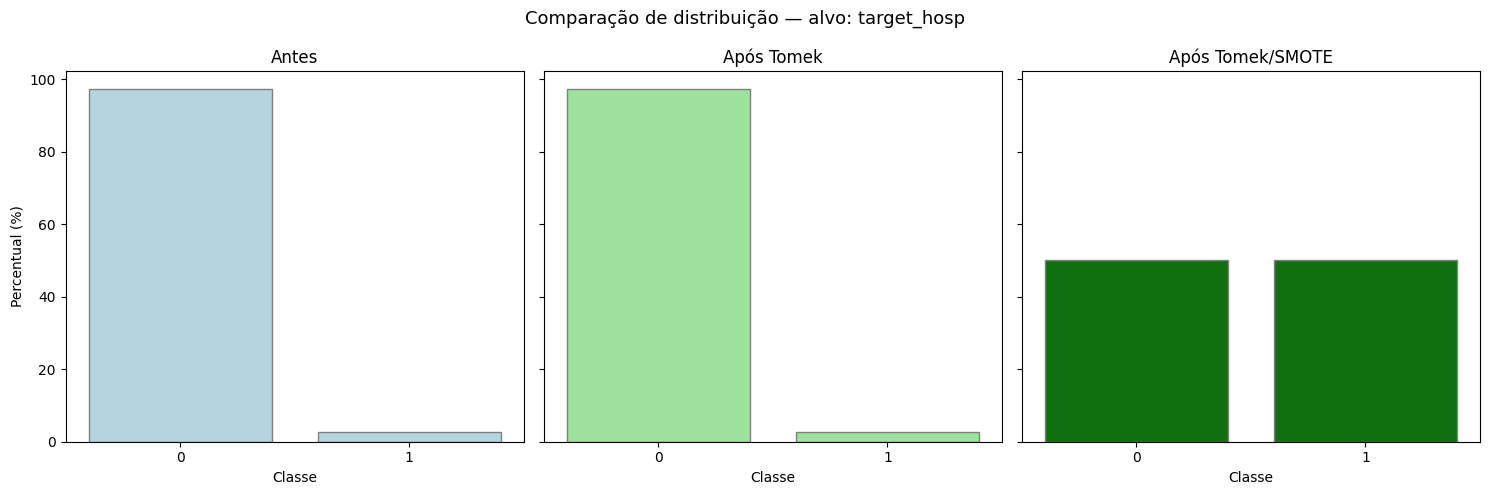

In [ ]:
# 5.5 Auditoria comparativa de balanceamento (Antes → Pós-Tomek → Pós-Tomek-SMOTE)
# ------------------------------------------------
# - Objetivo: comparar a distribuição das classes ao longo das etapas de balanceamento.
# ------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dist_original = (y.value_counts(normalize=True) * 100).round(2).to_dict()
dist_tomek    = (y_tomek.value_counts(normalize=True) * 100).round(2).to_dict()
dist_tomek_smote    = (y_tomek_smote.value_counts(normalize=True) * 100).round(2).to_dict()

audit_balance = pd.DataFrame({
    "Antes (%)": dist_original,
    "Após Tomek (%)": dist_tomek,
    "Após Tomek/SMOTE (%)": dist_tomek_smote
}).T

print("=== Auditoria comparativa do balanceamento ===")
print(audit_balance)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(x=list(dist_original.keys()), y=list(dist_original.values()),
            ax=axes[0], color="lightblue", edgecolor="gray")
axes[0].set_title("Antes")

sns.barplot(x=list(dist_tomek.keys()), y=list(dist_tomek.values()),
            ax=axes[1], color="lightgreen", edgecolor="gray")
axes[1].set_title("Após Tomek")

sns.barplot(x=list(dist_tomek_smote.keys()), y=list(dist_tomek_smote.values()),
            ax=axes[2], color="green", edgecolor="gray")
axes[2].set_title("Após Tomek/SMOTE")

for ax in axes:
    ax.set_xlabel("Classe")
    ax.set_ylabel("Percentual (%)")

plt.suptitle(f"Comparação de distribuição — alvo: {target_col}", fontsize=13)
plt.tight_layout()
plt.show()


## 💾 Serialização dos dados balanceados (Pós Tomek-SMOTE)

In [ ]:
# 💾 Serialização em Pickle (PKL) — Pós-SMOTE
# -------------------------------------------------
# Objetivo:
#   - Salvar os datasets balanceados em formato .pkl
#   - Preserva dtypes (ex: Int64, categorias) que podem se perder no CSV
# Saída:
#   - X_mpox_2022_target_hosp_tomek_smote.pkl
#   - y_mpox_2022_target_hosp_tomek_smote.pkl
# -------------------------------------------------

#import joblib

# Caminhos de saída
X_tomek_smote_pkl = "X_mpox_2022_target_hosp_tomek_smote.pkl"
y_tomek_smote_pkl = "y_mpox_2022_target_hosp_tomek_smote.pkl"

# Serializa com joblib (mais eficiente para DataFrames grandes)
joblib.dump(pd.DataFrame(X_tomek_smote, columns=X_num_imp_scaled.columns), X_tomek_smote_pkl)
joblib.dump(y_tomek_smote, y_tomek_smote_pkl)

print(f"✔️ X_tomek_smote salvo em: {X_tomek_smote_pkl}")
print(f"✔️ y_tomek_smote salvo em: {y_tomek_smote_pkl}")

# Checagem pós-salvamento
X_check = joblib.load(X_tomek_smote_pkl)
y_check = joblib.load(y_tomek_smote_pkl)

print("\nChecagem pós-salvamento PKL:")
print("X_tomek_smote:", X_check.shape, "→ dtypes:", X_check.dtypes.unique())
print("y_tomek_smote:", y_check.shape, "→ dtype:", y_check.dtypes)
print(f"\nDistribuição alvo ({y_tomek_smote_pkl[0:-4]}):")
print("🎯Variável-alvo:", )
print(y_check.value_counts(normalize=True) * 100)


✔️ X_tomek_smote salvo em: X_mpox_2022_target_hosp_tomek_smote.pkl
✔️ y_tomek_smote salvo em: y_mpox_2022_target_hosp_tomek_smote.pkl

Checagem pós-salvamento PKL:
X_tomek_smote: (21198, 1388) → dtypes: [dtype('float64')]
y_tomek_smote: (21198,) → dtype: int64

Distribuição alvo (y_mpox_2022_target_hosp_tomek_smote):
🎯Variável-alvo:
target_hosp
0    50.0
1    50.0
Name: proportion, dtype: float64


## 📂 Desserialização do dataset pré-processado

In [ ]:
# 📂 Desserialização do dataset pré-processado

filename = project_path + f"mpox_2022_prep.parquet"
df_prep = pd.read_parquet(filename)
print("✅ df_prep carregado com sucesso:", df_prep.shape)

# Visualizar primeiras linhas
df_prep.head(1)

NameError: name 'project_path' is not defined

---
## **Atividade 6: Treinamento dos modelos de Machine Learning**
- Comparar modelos: testar diferentes classificadores
    - Classificação binária
    - Modelos: Naive Bayes, Árvore de Decisão, Random Forest, Aprendizagem baseada em instâncias - kNN, Regressão logística, SVM, Redes Neurais Artificiais
- Medir desempenho com métricas adequadas e evitar overfitting
- Investigar como técnicas de imputação e codificação impactam os resultados
- Escolher e ajustar modelos (gridsearch/validação cruzada)
---

Configuração Inicial:

- 📦 Importação das bibliotecas
- 🔄 Carregar dados já pré-processados (Tomek + SMOTE aplicados)
- ✂️ Divisão treino/teste


In [ ]:
# ================================
# 📦 Importação das bibliotecas
# ================================
# pandas/numpy → manipulação de dados
import pandas as pd
import numpy as np

# sklearn → modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, RocCurveDisplay
)

# visualização
import matplotlib.pyplot as plt
import seaborn as sns

# salvar/carregar modelos
import joblib

# ================================
# 🔄 Carregar dados já pré-processados (Tomek + SMOTE aplicados)
# ================================
X = joblib.load("/content/X_mpox_2022_target_hosp_tomek_smote.pkl")
y = joblib.load("/content/y_mpox_2022_target_hosp_tomek_smote.pkl")

# ================================
# ✂️ Divisão treino/teste
# - Mantemos proporção de classes (stratify=y)
# - 80% treino, 20% teste
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Tamanho treino:", X_train.shape, " | Tamanho teste:", X_test.shape)
print("Distribuição classes (treino):\n", y_train.value_counts(normalize=True))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Função auxiliar de avaliação

In [ ]:
def avaliar_modelo(modelo, X_train, y_train, X_test, y_test, nome_modelo):
    """
    Treina e avalia um modelo de classificação.

    Passos:
    1. Treina com dados de treino.
    2. Prediz nos dados de teste.
    3. Calcula métricas (Accuracy, Precision, Recall, F1, AUC).
    4. Exibe relatório, matriz de confusão e curva ROC.

    Retorna: dicionário com métricas principais (para comparação entre modelos).
    """
    # Treinamento do modelo
    modelo.fit(X_train, y_train)

    # Predição
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:,1] if hasattr(modelo, "predict_proba") else None

    # Cálculo das métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    # Exibição de resultados
    print(f"\n📊 Resultados - {nome_modelo}")
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print(f"AUC: {auc:.3f}")

    # Curva ROC (quando disponível)
    if y_proba is not None:
        RocCurveDisplay.from_estimator(modelo, X_test, y_test)
        plt.title(f"Curva ROC - {nome_modelo}")
        plt.show()

    # Retorno para comparação final
    return {"Modelo": nome_modelo, "Accuracy": acc, "Precision": prec,
            "Recall": rec, "F1": f1, "AUC": auc}

# Lista para armazenar os resultados de todos os modelos
resultados = []


In [ ]:
# Visualização rápida
print(X.head(1))
print(y.value_counts())

#type(X_loaded)
#type(y_loaded)


🔹 1. Naive Bayes

📘 Teoria: assume independência condicional entre atributos (Kelleher, cap. 8).
Bom para baseline rápido, mesmo que a suposição seja simplista.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
resultados.append(avaliar_modelo(nb, X_train, y_train, X_test, y_test, "Naive Bayes"))


🔹 2. Regressão Logística

📘 Teoria: modelo linear que estima probabilidades. Muito usado em saúde pela interpretabilidade (odds ratio).

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
resultados.append(avaliar_modelo(log_reg, X_train, y_train, X_test, y_test, "Regressão Logística"))


🔹 3. Árvore de Decisão

📘 Teoria: gera regras hierárquicas “if-then”. Boa interpretabilidade, mas risco de overfitting se não podada.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
resultados.append(avaliar_modelo(tree, X_train, y_train, X_test, y_test, "Árvore de Decisão"))


🔹 4. kNN

📘 Teoria: classifica pelo “voto” dos vizinhos mais próximos. Simples, mas sensível a escala e dados ruidosos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # k=5 é default, pode ser ajustado
resultados.append(avaliar_modelo(knn, X_train, y_train, X_test, y_test, "kNN"))


🔹 5. Random Forest

📘 Teoria: conjunto de várias árvores de decisão com amostragem aleatória. Reduz overfitting, aumenta robustez

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
resultados.append(avaliar_modelo(rf, X_train, y_train, X_test, y_test, "Random Forest"))


🔹 6. SVM

📘 Teoria: encontra hiperplano ótimo para separar classes. Potente em dados complexos, mas exige tuning (kernel, C, γ).

In [ ]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)  # probability=True para permitir ROC
resultados.append(avaliar_modelo(svm, X_train, y_train, X_test, y_test, "SVM"))


🔹 7. Rede Neural (MLP)

📘 Teoria: modelo inspirado no cérebro humano, com múltiplas camadas ocultas. Captura padrões complexos, mas menos interpretável.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
resultados.append(avaliar_modelo(mlp, X_train, y_train, X_test, y_test, "Rede Neural (MLP)"))


🔹 Comparação final entre modelos

In [ ]:
# Criar DataFrame comparativo
df_resultados = pd.DataFrame(resultados)

print("\n📊 Comparação de Métricas entre Modelos")
display(df_resultados.sort_values(by="F1", ascending=False))


---
## **Atividade 7: Usar o modelo treinado**
- Salvar os transformadores
- Salvar o modelo
- Fazer predição usando dados novos
---


Naive Bayes

In [ ]:
# ✅ Exemplo: supondo que Random Forest foi o melhor (ajustar conforme resultados)
modelo_final = nb

# Salvar pipeline completo (inclui pré-processamentos e modelo final)
joblib.dump(modelo_final, "modelo_final_nb.pkl")

# Recarregar modelo para validar reutilização
modelo_carregado = joblib.load("modelo_final_nb.pkl")

# Simular predição em 5 registros de teste
amostra = X_test.iloc[:5]
print("\n🔮 Predições em novos dados simulados:")
print("Probabilidades:", modelo_carregado.predict_proba(amostra))
print("Classe prevista:", modelo_carregado.predict(amostra))


SVM

In [ ]:
# ✅ Exemplo: supondo que Random Forest foi o melhor (ajustar conforme resultados)
modelo_final = nb

# Salvar pipeline completo (inclui pré-processamentos e modelo final)
joblib.dump(modelo_final, "modelo_final_nb.pkl")

# Recarregar modelo para validar reutilização
modelo_carregado = joblib.load("modelo_final_nb.pkl")

# Simular predição em 5 registros de teste
amostra = X_test.iloc[:5]
print("\n🔮 Predições em novos dados simulados:")
print("Probabilidades:", modelo_carregado.predict_proba(amostra))
print("Classe prevista:", modelo_carregado.predict(amostra))


Árvore de Decisão

In [ ]:
# ✅ Exemplo: supondo que Random Forest foi o melhor (ajustar conforme resultados)
modelo_final = tree

# Salvar pipeline completo (inclui pré-processamentos e modelo final)
joblib.dump(modelo_final, "modelo_final_nb.pkl")

# Recarregar modelo para validar reutilização
modelo_carregado = joblib.load("modelo_final_nb.pkl")

# Simular predição em 5 registros de teste
amostra = X_test.iloc[:5]
print("\n🔮 Predições em novos dados simulados:")
print("Probabilidades:", modelo_carregado.predict_proba(amostra))
print("Classe prevista:", modelo_carregado.predict(amostra))


Rede Neural (MLP)

In [ ]:
# ✅ Exemplo: supondo que Random Forest foi o melhor (ajustar conforme resultados)
modelo_final = mlp

# Salvar pipeline completo (inclui pré-processamentos e modelo final)
joblib.dump(modelo_final, "modelo_final_mlp.pkl")

# Recarregar modelo para validar reutilização
modelo_carregado = joblib.load("modelo_final_mlp.pkl")

# Simular predição em 5 registros de teste
amostra = X_test.iloc[:5]
print("\n🔮 Predições em novos dados simulados:")
print("Probabilidades:", modelo_carregado.predict_proba(amostra))
print("Classe prevista:", modelo_carregado.predict(amostra))


Random Forest

In [ ]:
# ✅ Exemplo: supondo que Random Forest foi o melhor (ajustar conforme resultados)
modelo_final = rf

# Salvar pipeline completo (inclui pré-processamentos e modelo final)
joblib.dump(modelo_final, "modelo_final_rf.pkl")

# Recarregar modelo para validar reutilização
modelo_carregado = joblib.load("modelo_final_rf.pkl")

# Simular predição em 5 registros de teste
amostra = X_test.iloc[:5]
print("\n🔮 Predições em novos dados simulados:")
print("Probabilidades:", modelo_carregado.predict_proba(amostra))
print("Classe prevista:", modelo_carregado.predict(amostra))


Regressão Logística

In [ ]:
# ✅ Exemplo: supondo que Random Forest foi o melhor (ajustar conforme resultados)
modelo_final = log_reg

# Salvar pipeline completo (inclui pré-processamentos e modelo final)
joblib.dump(modelo_final, "modelo_final_log_reg.pkl")

# Recarregar modelo para validar reutilização
modelo_carregado = joblib.load("modelo_final_log_reg.pkl")

# Simular predição em 5 registros de teste
amostra = X_test.iloc[:5]
print("\n🔮 Predições em novos dados simulados:")
print("Probabilidades:", modelo_carregado.predict_proba(amostra))
print("Classe prevista:", modelo_carregado.predict(amostra))


kNN

In [ ]:
# ✅ Exemplo: supondo que Random Forest foi o melhor (ajustar conforme resultados)
modelo_final = knn

# Salvar pipeline completo (inclui pré-processamentos e modelo final)
joblib.dump(modelo_final, "modelo_final_knn.pkl")

# Recarregar modelo para validar reutilização
modelo_carregado = joblib.load("modelo_final_knn.pkl")

# Simular predição em 5 registros de teste
amostra = X_test.iloc[:5]
print("\n🔮 Predições em novos dados simulados:")
print("Probabilidades:", modelo_carregado.predict_proba(amostra))
print("Classe prevista:", modelo_carregado.predict(amostra))


In [ ]:
import os

# ================================
# 📂 Criar pasta para salvar os modelos
# ================================
os.makedirs("modelos_salvos", exist_ok=True)

# ================================
# 🔄 Loop para salvar e recarregar todos os modelos
# ================================
modelos_treinados = {
    "NaiveBayes": nb,
    "RegressaoLogistica": log_reg,
    "ArvoreDecisao": tree,
    "kNN": knn,
    "RandomForest": rf,
    "SVM": svm,
    "RedeNeuralMLP": mlp
}

for nome, modelo in modelos_treinados.items():
    print(f"\n=== 🔄 Testando reuso do modelo: {nome} ===")

    # 1. Salvar modelo em arquivo PKL
    caminho = f"modelos_salvos/{nome}.pkl"
    joblib.dump(modelo, caminho)
    print(f"✅ Modelo salvo em: {caminho}")

    # 2. Recarregar modelo salvo
    modelo_carregado = joblib.load(caminho)

    # 3. Testar predição em uma pequena amostra (5 registros de teste)
    amostra = X_test.iloc[:5]
    pred = modelo_carregado.predict(amostra)
    proba = modelo_carregado.predict_proba(amostra)[:,1] if hasattr(modelo_carregado, "predict_proba") else "N/A"

    print("🔮 Predições:", pred)
    print("📊 Probabilidades:", proba)
